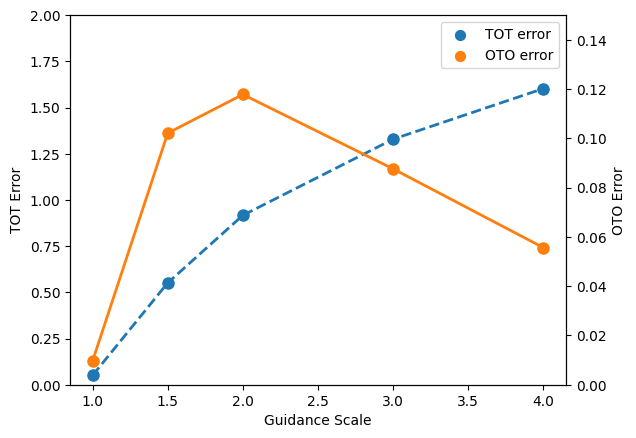

In [8]:
import matplotlib.pyplot as plt

# Data for the x-axis
x_data = [1, 1.5, 2, 3, 4]

# Data for the first scatter plot (TOT error)
y1_data = [0.0503, 0.5512, 0.9169, 1.3287, 1.6028]

# Data for the second scatter plot (OTO error)
y2_data = [0.0096, 0.1021, 0.1178, 0.0876, 0.0556]

# Choose a color combination that is distinguishable and in a similar hierarchy
color1 = '#1f77b4'  # Blue
color2 = '#ff7f0e'  # Orange

# Create a figure and axis
fig, ax1 = plt.subplots()

# Create a scatter plot for the first set of data (TOT error)
ax1.scatter(x_data, y1_data, label='TOT error', color=color1, s=50)  # s is the markersize

# Connect the points with thicker lines and a different linestyle for the first scatter plot
ax1.plot(x_data, y1_data, linestyle='--', marker='o', color=color1, linewidth=2, markersize=8)  # Set linewidth and markersize

# Set y-axis label and range for the first scatter plot
ax1.set_ylabel('TOT Error')
ax1.set_ylim(0, 2)  # Set the y-axis range for the first scatter plot

# Create a second y-axis for the second scatter plot
ax2 = ax1.twinx()

# Create a scatter plot for the second set of data (OTO error)
ax2.scatter(x_data, y2_data, label='OTO error', color=color2, s=50)  # s is the markersize

# Connect the points with thicker lines and a different linestyle for the second scatter plot
ax2.plot(x_data, y2_data, linestyle='-', marker='o', color=color2, linewidth=2, markersize=8)  # Set linewidth and markersize

# Set y-axis label and range for the second scatter plot
ax2.set_ylabel('OTO Error')
ax2.set_ylim(0, 0.15)  # Set the y-axis range for the second scatter plot

# Add labels and legends
ax1.set_xlabel('Guidance Scale')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')  # Place legend inside the plot area

# Show the plot
plt.show()


(array([42., 43., 34., 30., 40., 46., 45., 47., 39., 46., 42., 38., 37.,
        33., 38., 47., 45., 45., 31., 43., 51., 37., 43., 43., 38., 40.,
        42., 48., 41., 31., 43., 48., 35., 55., 55., 45., 43., 51., 47.,
        26., 41., 40., 36., 35., 46., 27., 28., 44., 41., 34., 50., 36.,
        44., 50., 35., 34., 33., 41., 48., 46., 45., 42., 33., 32., 46.,
        34., 41., 39., 44., 47., 46., 35., 32., 31., 42., 55., 34., 41.,
        30., 36., 30., 46., 40., 50., 34., 31., 33., 33., 47., 54., 46.,
        41., 34., 49., 42., 47., 48., 48., 43., 53.]),
 array([4.43999924e-04, 1.04392353e-02, 2.04344707e-02, 3.04297061e-02,
        4.04249415e-02, 5.04201768e-02, 6.04154122e-02, 7.04106476e-02,
        8.04058830e-02, 9.04011184e-02, 1.00396354e-01, 1.10391589e-01,
        1.20386825e-01, 1.30382060e-01, 1.40377295e-01, 1.50372531e-01,
        1.60367766e-01, 1.70363001e-01, 1.80358237e-01, 1.90353472e-01,
        2.00348708e-01, 2.10343943e-01, 2.20339178e-01, 2.30334414e-01,
  

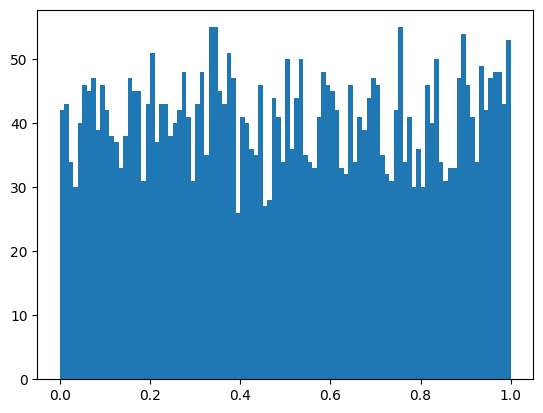

In [9]:
import numpy as np
import pywt
from matplotlib import pyplot as plt
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

x = np.random.rand(64, 64)

plt.hist(x.flatten(), bins=100)

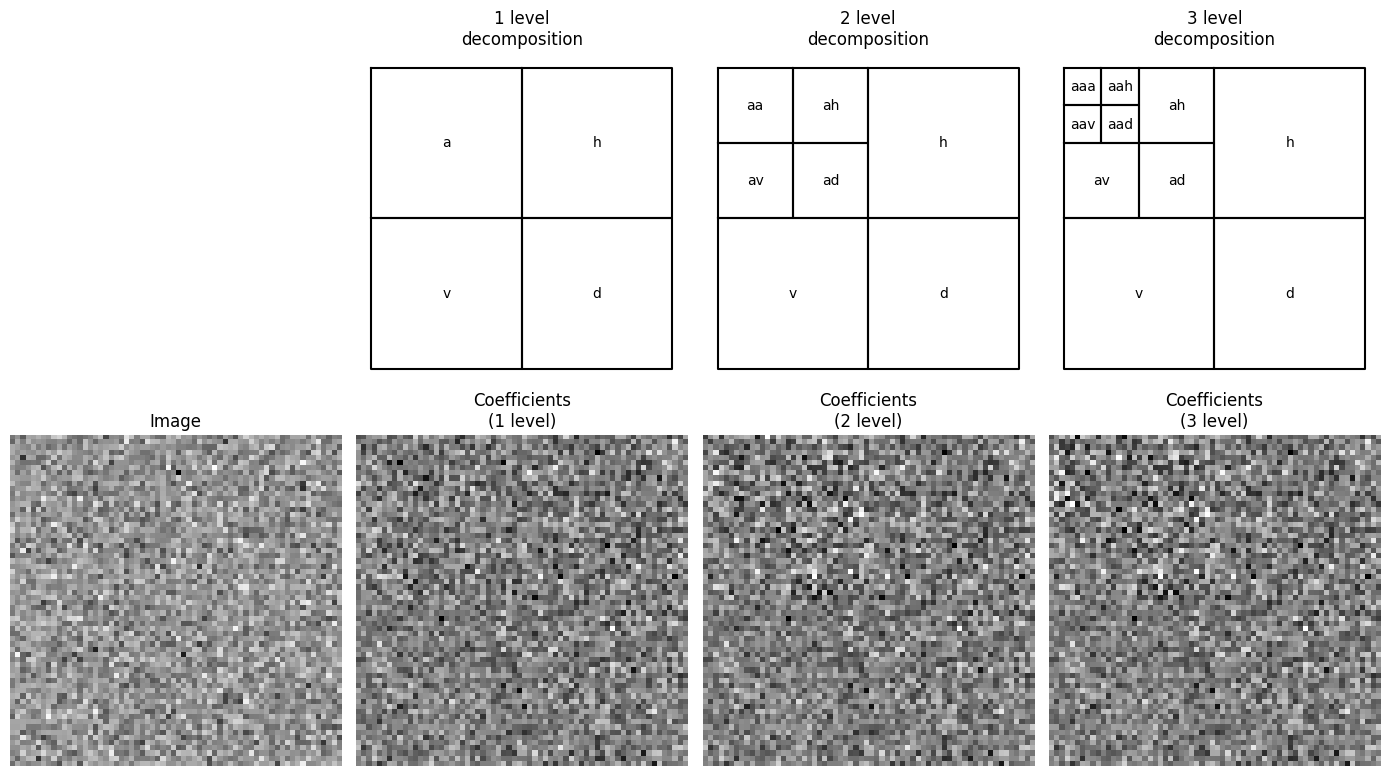

In [10]:
import numpy as np
import torch
import pywt
from matplotlib import pyplot as plt
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

size = (64, 64)
mean = 0
std_dev = 1

x = np.random.normal(mean, std_dev, size)
shape = x.shape

max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(x, 'db2', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

In [11]:
from scipy.stats import chi2_contingency

# Flatten the 2D noise to a 1D array
flattened_noise = x.flatten()

# Define expected frequencies based on a Gaussian distribution
expected_freq, _ = np.histogram(flattened_noise, bins='auto', density=True)
expected_freq *= len(flattened_noise)

# Calculate observed frequencies
observed_freq, _ = np.histogram(flattened_noise, bins='auto')

# Perform the Chi-square test
chi2_stat, p_value, _, _ = chi2_contingency([observed_freq, expected_freq])

# Output results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The noise distribution is significantly different from a Gaussian distribution.")
else:
    print("Fail to reject the null hypothesis: The noise distribution is consistent with a Gaussian distribution.")


ValueError: The internally computed table of expected frequencies has a zero element at (0, 1).

In [15]:
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

def plot_wavelet_transformation(x):
    shape = x.shape

    max_lev = 3       # how many levels of decomposition to draw
    label_levels = 3  # how many levels to explicitly label on the plots

    fig, axes = plt.subplots(2, 4, figsize=[14, 8])
    for level in range(0, max_lev + 1):
        if level == 0:
            # show the original image before decomposition
            axes[0, 0].set_axis_off()
            axes[1, 0].imshow(x, cmap=plt.cm.gray)
            axes[1, 0].set_title('Image')
            axes[1, 0].set_axis_off()
            continue

        # plot subband boundaries of a standard DWT basis
        draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                        label_levels=label_levels)
        axes[0, level].set_title('{} level\ndecomposition'.format(level))

        # compute the 2D DWT
        c = pywt.wavedec2(x, 'db2', mode='periodization', level=level)
        # normalize each coefficient array independently for better visibility
        c[0] /= np.abs(c[0]).max()
        for detail_level in range(level):
            c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
        # show the normalized coefficients
        arr, slices = pywt.coeffs_to_array(c)
        axes[1, level].imshow(arr, cmap=plt.cm.gray)
        axes[1, level].set_title('Coefficients\n({} level)'.format(level))
        axes[1, level].set_axis_off()

    plt.tight_layout()
    plt.show()

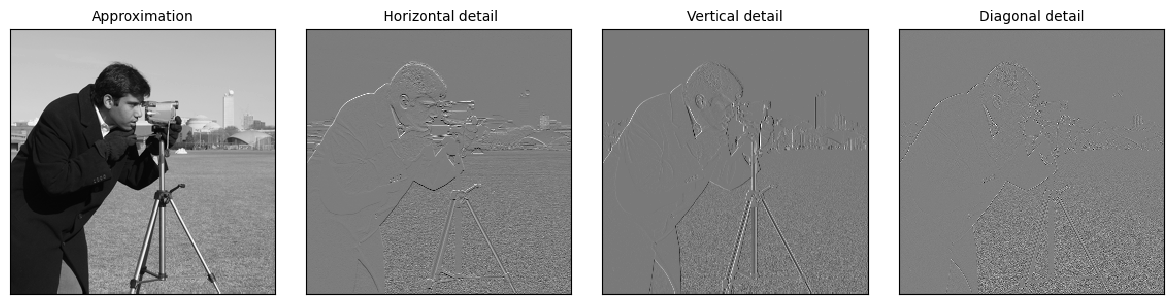

In [16]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

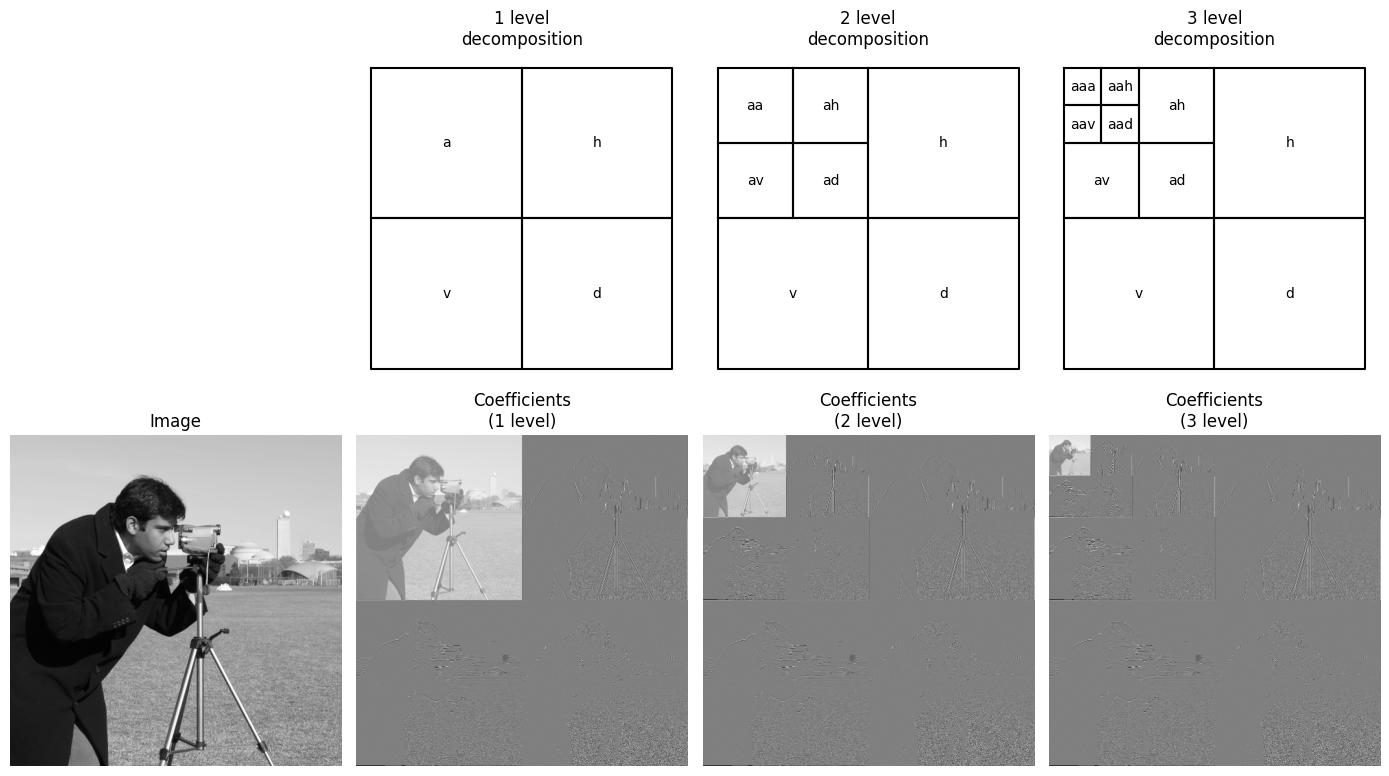

In [17]:
plot_wavelet_transformation(original)